###**PROJECT MOTIVE**
**SITUATION**
- Aerofit ia a reputed Brand in the fitness equipment market, Offering a variety of treadmills tailored for different customer segments.
- Over the past three months, Aerofit has gathered customer data from treadmill Purchases, Which includes Product type, Customer Demographics and Customer fitness habits.
- The company wants to Leverage this data to understand its customer base better and optimize product recommendations for future buyers.

**TASK**
- The task is to perform a descriptive analytics:
  - Customer Profiling based on the treadmill they Purchased(KP281, KP481, KP781).
  - Understand the relationship between customer characteristics(Like Age, Income, Gender, Fitness Level).
  - Calculate Marginal and Conditional Probabilities To reveal trends in Customer Behavior.
  - Use Visualization methods to Identify Patterns, Outliers(IQR) & Correlation.
  - Deliver actionable Insights for the marketing team and sales team to target customers for purchasing treadmill.

**ACTION**
- Loading dataset, structure, data types, statistical summary,
- Convert appropriate categorical variables
- Handling Missing values, analysing outliers using Boxplot and statistical summary
- Non Graphical analysis, Visual analysis
- Univariate analysis, Distribution of each feature using Histplot, countplots.
- bivariate analysis, using Boxplot, barplot, to explore the relationship between features.
- Using Cross tabulation to compute and visualize Marginal Probability and Conditional Probability.
  - Analyze relationships like:
    - Do single people prefer a specific product?
    - Do higher Fitness levels correlate with more Expensive product?
    - Do higher Income People correlate with more Expensive product?
    - Do Youngsters correlate with more Expensive product?
- Correlation Anaysis, Heatmap, and pairplots to explore Numerical relationships( Usage, Income, Miles)
- Probabilty analysis
  - To analyze Conditional and Marginal Probabilty
    - Probabilty that male customers buys KP781
    - Probabilty that a person aged>40 prefers KP281

**RESULT**


###**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###**IMPORTING DATASET**

In [ ]:
df = pd.read_csv('aerofit_treadmill.txt')

###**ORIGINAL DATASET**

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


#Observations:
- The data belongs to Aerofit Treadmill Product, It contains 180 entries and 9 Features. It is a last 3 Months data.
- There are 9 Features in that Product has 3 types of Product (KP281, KP481, KP781).
- Features like Age, Gender, Education, MaritalStatus, Income are Customer Demographics.
- Usage, Fitness, Miles are Customer Fitness habits
- Education, Usage, Fitness are in Integer form but it should be converted into categoricals labels using Label Encoding.
- Because converting numbers into labels It easier to find out the relationships & Patterns across product

###**FEATURE ENGINEERING**

In [ ]:
# Mapping education years to degree labels
education_map = {
    12 : 'High School',
    13 : 'Some College',
    14 : 'Associate degree',
    15 : 'Bachelors degree',
    16 : 'Maters degree',
    18 : 'PhD',
    20 :  'PostDoc',
    21 :  'PostDoc'
}

df['education_level']  = df['Education'].map(education_map)

In [ ]:
# Usage category Mapping
usage_map = {
    2 : 'Low',
    3 : 'Moderate',
    4 : 'Moderate',
    5 : 'High',
    6 : 'High',
    7 : 'Very High'
}
df['usage_level'] = df['Usage'].map(usage_map)

In [ ]:
# Fitness mapping
fitness_map = {
    1 : 'Poor',
    2 : 'Below Average',
    3 : 'Average',
    4 : 'Good',
    5 : "Excellent"
}
df['fitness_level'] = df['Fitness'].map(fitness_map)

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,education_level,usage_level,fitness_level
0,KP281,18,Male,14,Single,3,4,29562,112,Associate degree,Moderate,Good
1,KP281,19,Male,15,Single,2,3,31836,75,Bachelors degree,Low,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,Associate degree,Moderate,Average
3,KP281,19,Male,12,Single,3,3,32973,85,High School,Moderate,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,Some College,Moderate,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,PostDoc,High,Excellent
176,KP781,42,Male,18,Single,5,4,89641,200,PhD,High,Good
177,KP781,45,Male,16,Single,5,5,90886,160,Maters degree,High,Excellent
178,KP781,47,Male,18,Partnered,4,5,104581,120,PhD,Moderate,Excellent


#Observation:
- The dataset contains 180 rows and 12 columns after feature engineering, In that Education_level, usage_level, Fitness_level are New column which are labels of Integers
- By adding this features We can easily visualize patterns.

###**PREVIEW THE DATASET**

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,education_level,usage_level,fitness_level
0,KP281,18,Male,14,Single,3,4,29562,112,Associate degree,Moderate,Good
1,KP281,19,Male,15,Single,2,3,31836,75,Bachelors degree,Low,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,Associate degree,Moderate,Average
3,KP281,19,Male,12,Single,3,3,32973,85,High School,Moderate,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,Some College,Moderate,Below Average


###**TAIL OF THE DATASET**

In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,education_level,usage_level,fitness_level
175,KP781,40,Male,21,Single,6,5,83416,200,PostDoc,High,Excellent
176,KP781,42,Male,18,Single,5,4,89641,200,PhD,High,Good
177,KP781,45,Male,16,Single,5,5,90886,160,Maters degree,High,Excellent
178,KP781,47,Male,18,Partnered,4,5,104581,120,PhD,Moderate,Excellent
179,KP781,48,Male,18,Partnered,4,5,95508,180,PhD,Moderate,Excellent


###**SHAPE OF THE DATASET**

In [ ]:
df.shape

(180, 12)

###**DATASET INFO**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product          180 non-null    object
 1   Age              180 non-null    int64 
 2   Gender           180 non-null    object
 3   Education        180 non-null    int64 
 4   MaritalStatus    180 non-null    object
 5   Usage            180 non-null    int64 
 6   Fitness          180 non-null    int64 
 7   Income           180 non-null    int64 
 8   Miles            180 non-null    int64 
 9   education_level  180 non-null    object
 10  usage_level      180 non-null    object
 11  fitness_level    180 non-null    object
dtypes: int64(6), object(6)
memory usage: 17.0+ KB


#Observations:
- The dataset contains 180 enties and 12 features with different datatypes
- Dataset having Non-NULL values.

###**DATATYPES**

In [ ]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64
education_level,object


###**CHECKING DUPLICATES**

In [ ]:
df.drop_duplicates()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,education_level,usage_level,fitness_level
0,KP281,18,Male,14,Single,3,4,29562,112,Associate degree,Moderate,Good
1,KP281,19,Male,15,Single,2,3,31836,75,Bachelors degree,Low,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,Associate degree,Moderate,Average
3,KP281,19,Male,12,Single,3,3,32973,85,High School,Moderate,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,Some College,Moderate,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,PostDoc,High,Excellent
176,KP781,42,Male,18,Single,5,4,89641,200,PhD,High,Good
177,KP781,45,Male,16,Single,5,5,90886,160,Maters degree,High,Excellent
178,KP781,47,Male,18,Partnered,4,5,104581,120,PhD,Moderate,Excellent


###**HANDLING NULL VALUES**

In [ ]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0
education_level,0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

###**STATISTICAL SUMMARY**

In [ ]:
df.describe(include = 'object')

,Product,Gender,MaritalStatus,education_level,usage_level,fitness_level
count,180,180,180,180,180,180
unique,3,2,2,7,4,5
top,KP281,Male,Partnered,Maters degree,Moderate,Average
freq,80,104,107,85,121,97


#Observation:
- The Product column has 3 unique caegories which are KP281, KP481, KP781, In that KP281 is the Frequent one.
- Gender has two categories like Male & Female, In that male are the Dominant one.
- MaritalStatus has two categories Like partnered & Single, In that Partnered was the most frequent one who buys the Product.
- The customers who are Frequently purachsing the product are their education is master's degree and usage level is Moderate & Their fitness level is average.

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#Observation:
- In the statistical summary for Numerical variables.
- Age column is a Min is 18, max is 50, average is 28, Distribution is Right skewed distribution.
- Income & Miles are Right skewed dsitribution.

###**FEATURES**

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'education_level', 'usage_level',
       'fitness_level'],
      dtype='object')

###**VALUE COUNTS**

**VALUE COUNTS FOR PRODUCT**

In [ ]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
df['Product'].value_counts(normalize = True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


#Observation:
- KP281 has the highest count with 80 occurences.
- KP481 Follows with 60 occurences.
- KP781 has the lowest count with 40 occurences.
- There are 180 entries for Product column

**VALUE COUNTS FOR GENDER**

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


#Observation:
- There are 104 Males and 76 Females entries in the dataset.
- This Indicates a Mlae-Dominant customer Base.

**VALUE COUNTS FOR EDUCATION LEVEL**

In [ ]:
df['education_level'].value_counts(normalize = True)

,proportion
education_level,
Maters degree,0.472222
Associate degree,0.305556
PhD,0.127778
Some College,0.027778
Bachelors degree,0.027778
PostDoc,0.022222
High School,0.016667


#Observation:
- The majority of individuals in the dataset Hold a master's Degree Which accounts for about 47%.
- This is followed by Associate Degree Holders, Indicating That most of the customers are Highly educated.
- Advanced degrees like PhD & PostDoc Together makeup of 15%.
- Only a small fractrion includes with bachelors, some college, High schools education levels.

**VALUE COUNTS FOR MARITAL STATUS**

In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
df['MaritalStatus'].value_counts(normalize = True)

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


#Observation:
- Out of 180 Individuals, The majority people with 59% are partnered.
- The remaing 73 People are single

**VALUE COUNTS FOR USAGE LEVEL**

In [ ]:
df['usage_level'].value_counts()

,count
usage_level,
Moderate,121
Low,33
High,24
Very High,2


In [ ]:
df['usage_level'].value_counts(normalize = True)

,proportion
usage_level,
Moderate,0.672222
Low,0.183333
High,0.133333
Very High,0.011111


#Observation:
- Moderate users dominate the dataset making up over 121 Count
- High and very high usage levels are rare.
- There is a significant drop from Low to High and High to very High.

**VALUE COUNTS FOR FITNESS LEVEL**

In [ ]:
df['fitness_level'].value_counts()

,count
fitness_level,
Average,97
Excellent,31
Below Average,26
Good,24
Poor,2


#Observations:
- Majority of the users fall under the Average Fitness level
- Only 31, are the Excellent level
- Very few users are classifies as poor.
- Below average + Good are balanced.

###**UNIVARIATE ANALYSIS**

###**PRODUCT DISTRIBUTION**

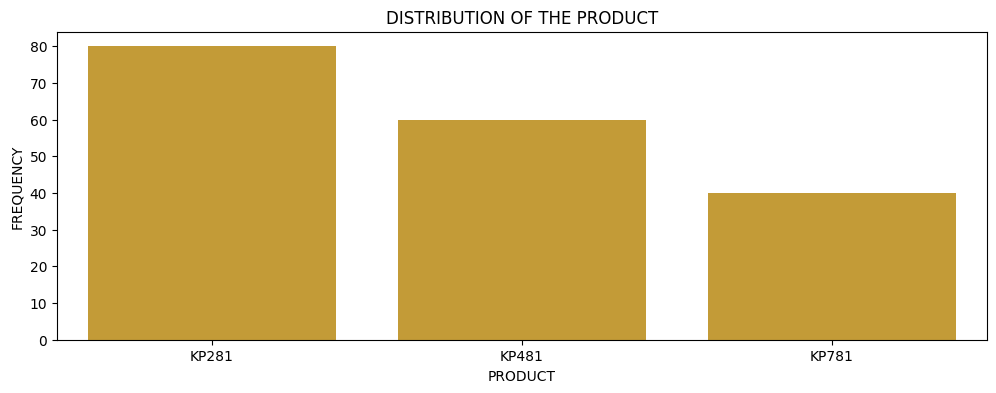

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(data = df, x = 'Product', color = 'goldenrod')
plt.title('DISTRIBUTION OF THE PRODUCT')
plt.xlabel("PRODUCT")
plt.ylabel('FREQUENCY')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()


#Observation:
- KP281 has the highest count with 80 occurences.
- KP481 Follows with 60 occurences.
- KP781 has the lowest count with 40 occurences.
- There are 180 entries for Product column

###**GENDER DISTRIBUTION**

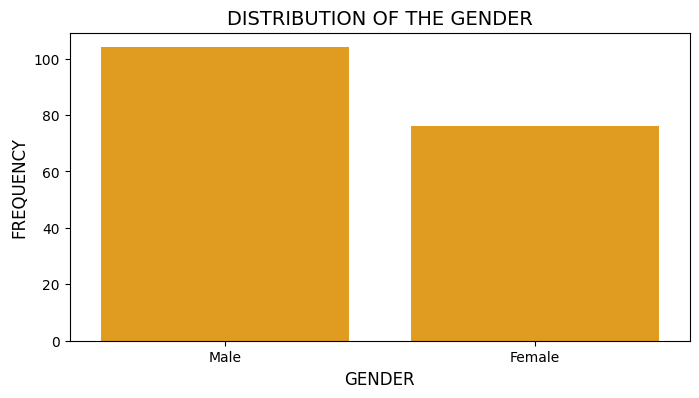

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data = df, x = 'Gender', color = 'orange')
plt.title('DISTRIBUTION OF THE GENDER', fontsize = 14)
plt.xlabel("GENDER", fontsize = 12)
plt.ylabel('FREQUENCY', fontsize = 12)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()


#Observation:
- There are 104 Males and 76 Females entries in the dataset.
- This Indicates a Mlae-Dominant customer Base.

###**EDUCATION LEVEL DISTRIBUTION**

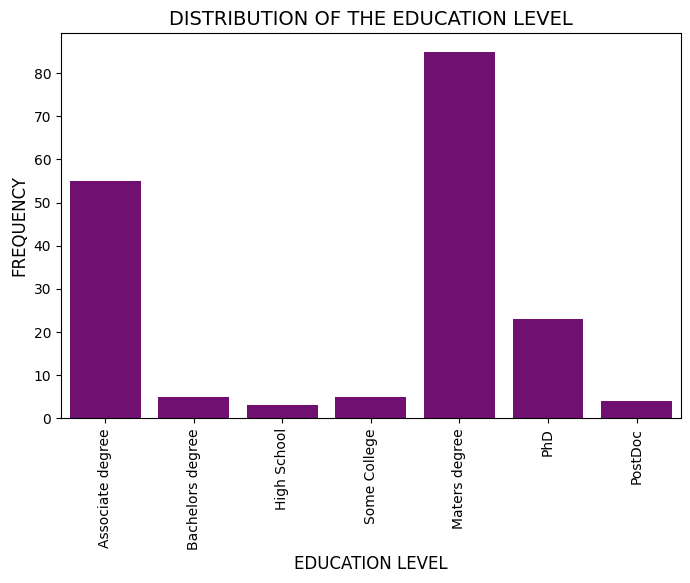

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'education_level', color = 'Purple')
plt.title('DISTRIBUTION OF THE EDUCATION LEVEL', fontsize = 14)
plt.xlabel("EDUCATION LEVEL", fontsize = 12)
plt.ylabel('FREQUENCY', fontsize = 12)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

#Observation:
- The majority of individuals in the dataset Hold a master's Degree Which accounts for about 47%.
- This is followed by Associate Degree Holders, Indicating That most of the customers are Highly educated.
- Advanced degrees like PhD & PostDoc Together makeup of 15%.
- Only a small fractrion includes with bachelors, some college, High schools education levels.

###**MARITAL STATUS DISTRIBUTION**

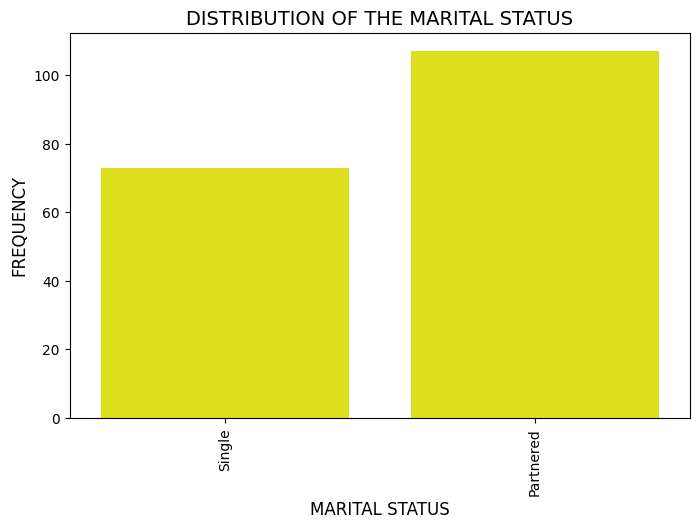

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'MaritalStatus', color = 'Yellow')
plt.title('DISTRIBUTION OF THE MARITAL STATUS', fontsize = 14)
plt.xlabel("MARITAL STATUS", fontsize = 12)
plt.ylabel('FREQUENCY', fontsize = 12)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

#Observation:
- Out of 180 Individuals, The majority people with 59% are partnered.
- The remaing 73 People are single

###**USAGE LEVEL DISTRIBUTION**

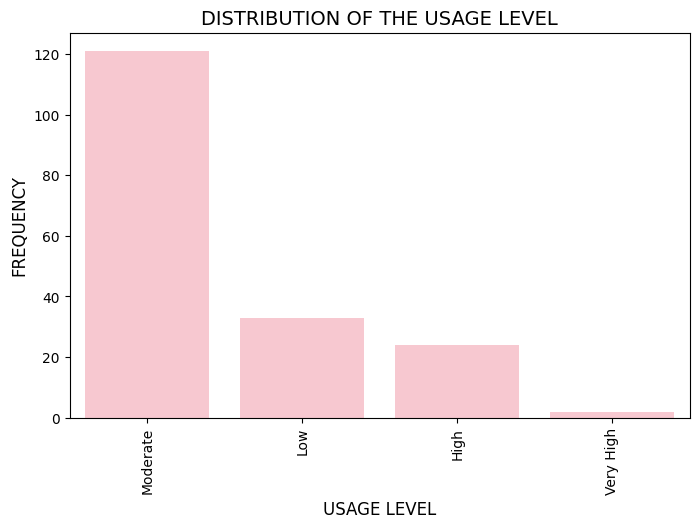

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x =  'usage_level', color = 'Pink')
plt.title('DISTRIBUTION OF THE USAGE LEVEL', fontsize = 14)
plt.xlabel("USAGE LEVEL", fontsize = 12)
plt.ylabel('FREQUENCY', fontsize = 12)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

#Observation:
- Moderate users dominate the dataset making up over 121 Count
- High and very high usage levels are rare.
- There is a significant drop from Low to High and High to very High.

###**FITNESS LEVEL DISTRIBUTION**

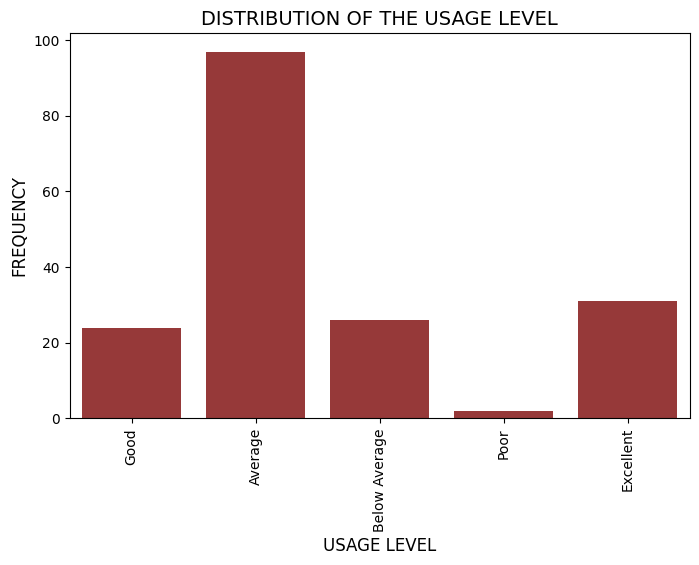

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'fitness_level', color = 'Brown')
plt.title('DISTRIBUTION OF THE USAGE LEVEL', fontsize = 14)
plt.xlabel("USAGE LEVEL", fontsize = 12)
plt.ylabel('FREQUENCY', fontsize = 12)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

#Observations:
- Majority of the users fall under the Average Fitness level
- Only 31, are the Excellent level
- Very few users are classifies as poor.
- Below average + Good are balanced.

###**DISTRIBUTION OF INCOME**

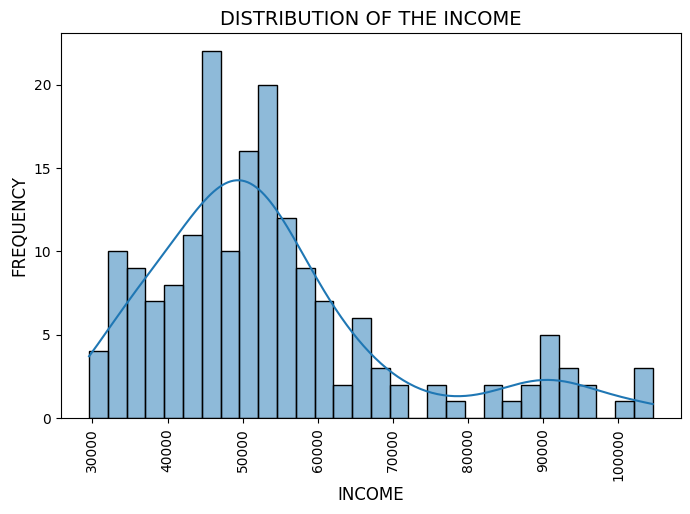

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'Income', bins = 30, kde = True)
plt.title('DISTRIBUTION OF THE INCOME', fontsize = 14)
plt.xlabel("INCOME", fontsize = 12)
plt.ylabel('FREQUENCY', fontsize = 12)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

#Observation:
- Most customers earn between 30000 to 60000, Few customers have Higher Incomes, Creating a long tail to the right.
- The distribution is Right-skewed Dsitribution.
- The peak is between 45,000 and 50,000, & The second peak is appears around 90,000 - 1,00,000.

###**SPREAD OF CUSTOMERS AGE**

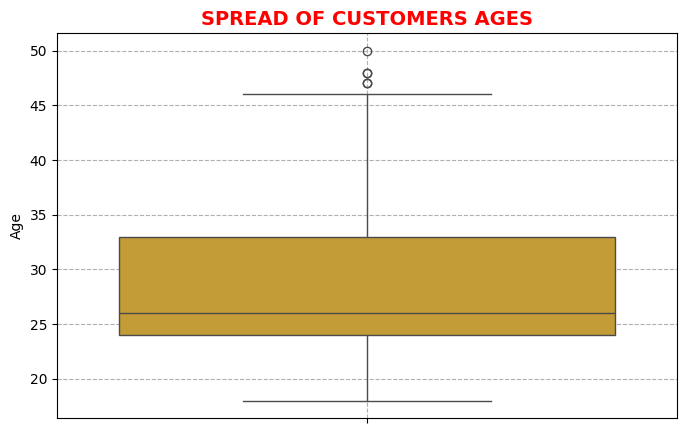

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, y = 'Age', color = "Goldenrod")
plt.title('SPREAD OF CUSTOMERS AGES', fontsize = 14, fontweight = 'extra bold', color = 'red')
plt.grid(True, linestyle = '--', alpha = 1)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()

#Observations:
- The median appears to be around 26 years, Half of the customers are younger than this age.
- The box represents the middle 50% of ages( Q1 TO Q3)
- Q1 : 23 years, Q3 : 33, IQR = 33-23 = 10 Years
- There are outliers above the upper Whisker, especially around 47-50 Years.

###**SPRAED OF THE INCOME**

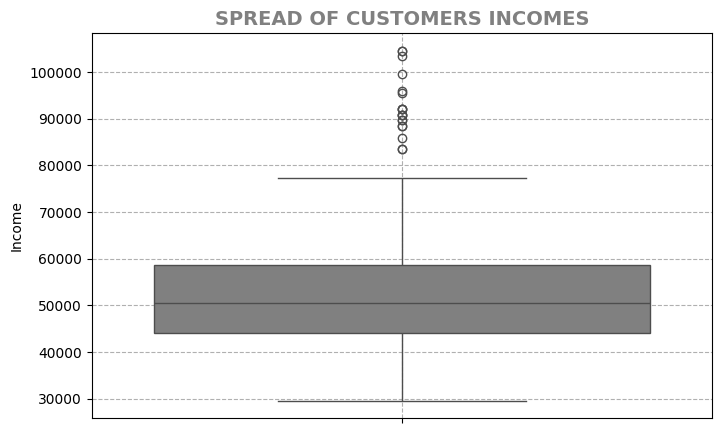

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, y = 'Income', color = "Grey")
plt.title('SPREAD OF CUSTOMERS INCOMES', fontsize = 14, fontweight = 'extra bold', color = 'Grey')
plt.grid(True, linestyle = '--', alpha = 1)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()

#Observation:
- The majority of customers have Incomes between 44,000 and 60,000.
- The median appears to be around 50,000 - 52,000
- The lower whisker extends down to around 30,000, and the upper whisker reaches roughly 78,000, This covers the Non-Outliers range of Income distribution.
- There are multiple Outliers above the upper Whisker, Mostly in the 80,000 to 105,000 range.
- These represent High-Income Customers.

###**CALCULATING CONDITIONAL PROBABILITY**
**Calculate the conditional probability that male customers buys the treadmill KP781**

**P(KP781|Male)** = **Number of Males who purchased KP781** / **Total Number of Male customer**

In [ ]:
# P(A|B) = P(A n B) / P(B)
# A = KP781
# B = Male
# P(KP781|Male) = P(KP781 n Male) / P(Male)

In [ ]:
# Count the Number of purchases by male customers
df[df['Gender'] == 'Male']['Product'].value_counts()

,count
Product,
KP281,40
KP781,33
KP481,31


In [ ]:
# P(KP781|Male) = P(KP781 n Male) / P(Male)
# P(KP781 n Male) = 33
# P(Male)         = 40 + 33 + 31 = 104
# P(KP781|Male) = P(KP781 n Male) / P(Male)
# P(KP781|Male) = 33/104 = 0.3173

In [ ]:
# Normalize to get proability
df[df['Gender'] == 'Male']['Product'].value_counts(normalize = True)

,proportion
Product,
KP281,0.384615
KP781,0.317308
KP481,0.298077


#Observation:
- Out of all male customers, about 31.7% Purchased the KP781 Treamill.

###**CONDITIONAL PROBABILITY : P(KP781|MALE)**

- Filter only male customers.
- Count how often each product was purachsed, Proability
- .get('KP781',0) --> retrives the probability of KP781 being purchased among males

In [ ]:
df[df['Gender'] == 'Male']['Product'].value_counts(normalize = True).get('KP781',0)

np.float64(0.3173076923076923)

###**CONDITIONAL PROBABILITY : P(KP281 | AGED > 40)**

In [ ]:
df[df['Age'] > 40]['Product'].value_counts(normalize = True).get('KP281',0)

np.float64(0.5)

#Observation:
- The number of customers who are aged greter than 40, who are purachsing the product KP281 is 50%

###**CONDITIONAL PROBABILTY : P(KP481|INCOME > 60,000)**

In [ ]:
df[df['Income'] > 60000]['Product'].value_counts(normalize = True).get('KP481',0)

np.float64(0.16666666666666666)

#Observation:
- The number of customers whose Income is greater than 60,000, & who are purachsing the product KP481 is 16.6%

#Marginal Probability of Purcahsing Each Treadmill

In [ ]:
df['Product'].value_counts(normalize = True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


###**Do single people prefer a specific product?**

In [ ]:
pd.crosstab(df['MaritalStatus'], df['Product'])

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [ ]:
pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


#Observations:
- KP281 is the most popular product for both single & Partnered People
- Single people slightly Prefer KP781(23.3%) More than partnered people(21.5%)
- The preferences are very similar for both groups.
- There is no big difference in product choice between single and partnered people.
- KP481 is less Prefered overall compared to KP281.

###**Do higher Fitness levels correlate with more expensive product?**

In [ ]:
pd.crosstab(df['fitness_level'], df['Product'])

Product,KP281,KP481,KP781
fitness_level,,,
Average,54,39,4
Below Average,14,12,0
Excellent,2,0,29
Good,9,8,7
Poor,1,1,0


In [ ]:
pd.crosstab(df['fitness_level'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
fitness_level,,,
Average,0.556701,0.402062,0.041237
Below Average,0.538462,0.461538,0.000000
Excellent,0.064516,0.000000,0.935484
Good,0.375000,0.333333,0.291667
Poor,0.500000,0.500000,0.000000


#Observation:
- Low fitness customers usually buy KP281 & KP481.
- Moderate fitness customers mostly choose KP281, Followed by KP481.
- High fitness customers mostly buy KP781, the expensive or High model Performance.
- KP781 Is clearly Preferred by the fitest group, It might be a premium treadmill.
- KP281 is the most popular overall, especially among average fitness people.

###**Do higher income people prefer expensive products?**

In [ ]:
df['Income'].max(), df['Income'].min()

(104581, 29562)

In [ ]:
# Binning Methods
bins = [ 0, 40000, 80000, 120000]
labels = ['low', 'Medium', 'high']
df['Income_Group'] = pd.cut(df['Income'], bins = bins, labels = labels)
pd.crosstab(df['Income_Group'], df['Product'],normalize='index')

Product,KP281,KP481,KP781
Income_Group,,,
low,0.71875,0.281250,0.000000
Medium,0.44186,0.395349,0.162791
high,0.00000,0.000000,1.000000


In [ ]:
pd.crosstab(df['Income_Group'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
Income_Group,,,
low,0.71875,0.281250,0.000000
Medium,0.44186,0.395349,0.162791
high,0.00000,0.000000,1.000000


#Observation:
- Low Income people mostly choose KP281, and none of them buy the expensive product KP781.
- Medium Income customers buy all three products, with a preference towards KP281.
- High-Income customers only buy KP781, showing a strong preferences for the most expensive product.
- KP781 is clearly Linked with High-Income Group, Likely due to its premium features.

###**Do youngsters prefer expensive products?**

In [ ]:
df['Age'].min(), df['Age'].max()

(18, 50)

In [ ]:
bins = [0,30,50,100]
labels = ['Young', 'Middle-aged', 'Seniors']
df['age_group'] = pd.cut(df['Age'], bins = bins , labels = labels)
pd.crosstab(df['age_group'], df['Product'],normalize='index')

Product,KP281,KP481,KP781
age_group,,,
Young,0.458333,0.291667,0.250000
Middle-aged,0.416667,0.416667,0.166667


#Observations:
- Young People are the largest group of buyers across all Products
- Youngsters show strong interest in both KP281 & KP781 Products
- Middle-aged customers buy less overall, with equal preferences for KP281 & KP481.
- There's no data for seniors.
- KP781 is more popular among younger people.

##**BIVARIATE ANALYSIS**

###**GENDER VS. MARITAL STATUS**

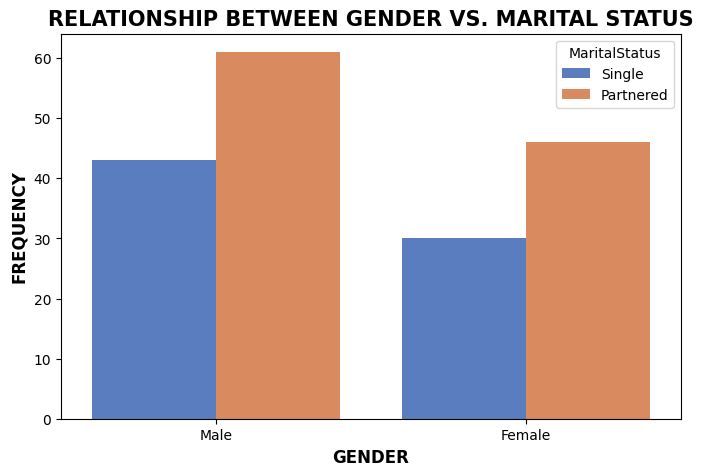

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'Gender', hue = 'MaritalStatus', palette = 'muted')
plt.title("RELATIONSHIP BETWEEN GENDER VS. MARITAL STATUS", fontsize = 15, fontweight = 'bold')
plt.xlabel('GENDER', fontsize = 12, fontweight = 'bold')
plt.ylabel('FREQUENCY', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 0)
plt.show()

#Obsevation:
- The above plot shows Male customers are dominant one, Followed by female.
- But In both Genders The customers are partnered are the dominant one.
- There are less number of customers who are belongs to single in both genders.

###**FITNEES LEVEL BY GENDER**

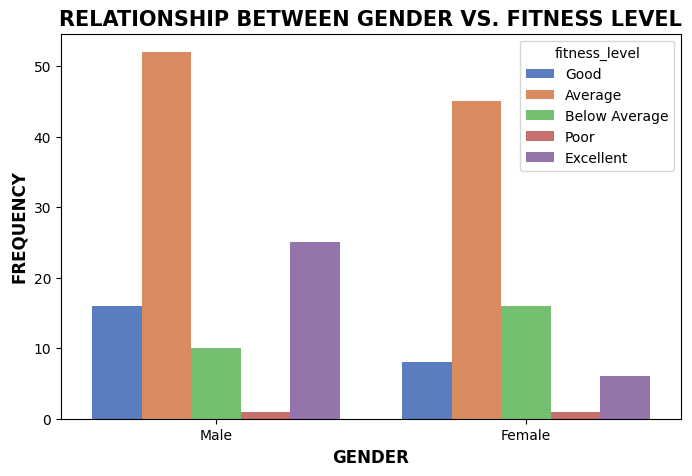

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'Gender', hue = 'fitness_level', palette = 'muted')
plt.title("RELATIONSHIP BETWEEN GENDER VS. FITNESS LEVEL", fontsize = 15, fontweight = 'bold')
plt.xlabel('GENDER', fontsize = 12, fontweight = 'bold')
plt.ylabel('FREQUENCY', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 0)
plt.show()

#Observation:
- Both males and females have the highest frequency in average Fitness level category.
- A significant higher number of males fall into the Excellent fitness category compared to females.
- Males Dominates Female in the Good category.
- Slightly more females are in the below average category than males.
- The poor category has the lowest frequency in both genders.

###**PRODUCT VS. INCOME**

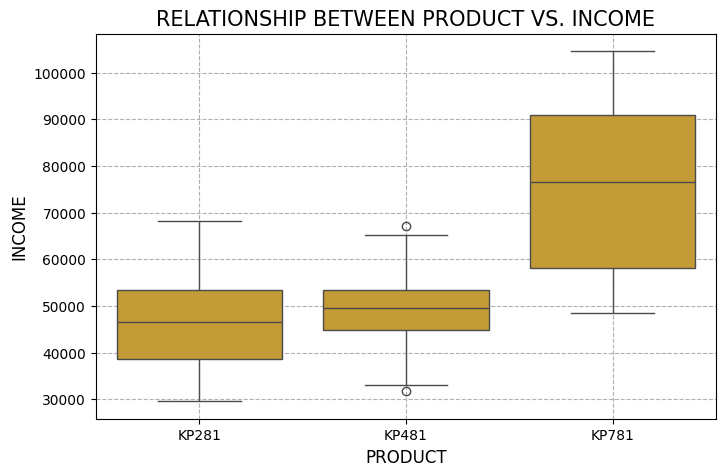

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'Product', y = 'Income', color = 'Goldenrod')
plt.title("RELATIONSHIP BETWEEN PRODUCT VS. INCOME", fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 1)
plt.xlabel('PRODUCT', fontsize = 12 )
plt.ylabel('INCOME', fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

#Observations:
- Customers buying KP781 have the highest Income, with a wide range and a High median
- KP281 & KP481 are mostly preferred by low to middle - Income groups.
- The Income levels for KP781 buyers are significantly Higher than the other two products.
- KP481 shows some outliers, Indicating a few customers with muach lower or higher Income.
- KP781 appears to be a premium Product targeting higher-Income customers.

###**PRODUCT VS AGE**

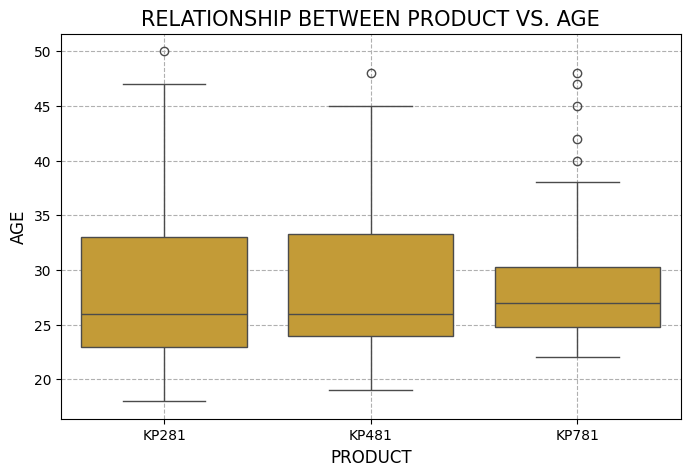

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'Product', y = 'Age', color = 'Goldenrod')
plt.title("RELATIONSHIP BETWEEN PRODUCT VS. AGE", fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 1)
plt.xlabel('PRODUCT', fontsize = 12 )
plt.ylabel('AGE', fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

#Observation:
- All three products are mostly purchased by people aged between 22 and 35.
- KP781 is slightly more popular among younger customers, with a lower median age.
- KP281 and KP481 have a wider age range, including some customers above 45.
- There are a few outliers for all products, especially for KP781, indicating occasional older users.
- Overall, younger and middle-aged customers seem to be the main buyers across all products.

###**CORRELATION ANALYSIS**

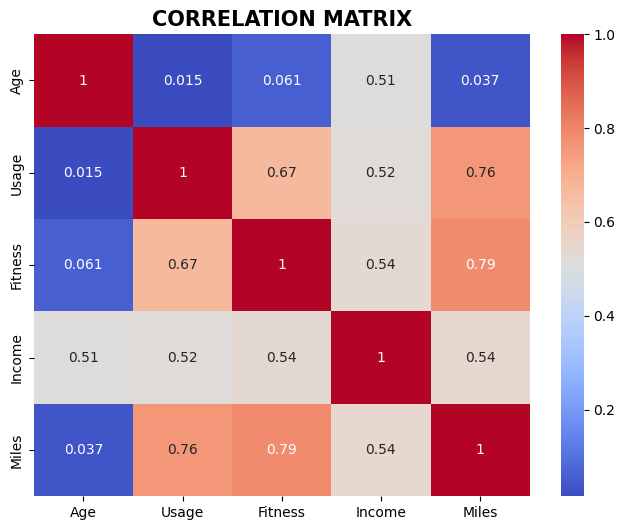

In [ ]:
plt.figure(figsize = (8,6))
correlation_matrix = df[['Age', 'Usage', 'Fitness', 'Income', 'Miles']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('CORRELATION MATRIX', fontsize = 15, fontweight = 'bold')
plt.show()

#Observations:
- **Strongest Positive Correlations:**
  - Fitness & Miles(0.79)
    - The fittest individuals tend to cover most of the miles.
  - Usage & Miles(0.76)
    - The people who use the product more also tend to cover more miles.
  - Usage & Fitness(0.67)
    - The fitter people tend to use the product more.

- **Income's Influence:**
  - Income has a moderate positive correlation with usage(0.52), Fitness(0.54) & Miles (0.54)
    - Higher Income generally leads to more product usage, Higher fitness levels, & More miles covered.

- **Age's Limited Impact:**
  - Age has the very weak correlation with Usage(0.015), Fitness(0.061) and Miles (0.037)
    - A person's age doesn't seem to be a significant factor in how much they use the Product, & their fitness level, or the miles
    - It's strongest correlation is with Income(0.51)
- Fitness, usage, and miles are highly Interconnected, Income also plays a role in these aspects.



###**PAIR PLOTS**

<Figure size 800x600 with 0 Axes>

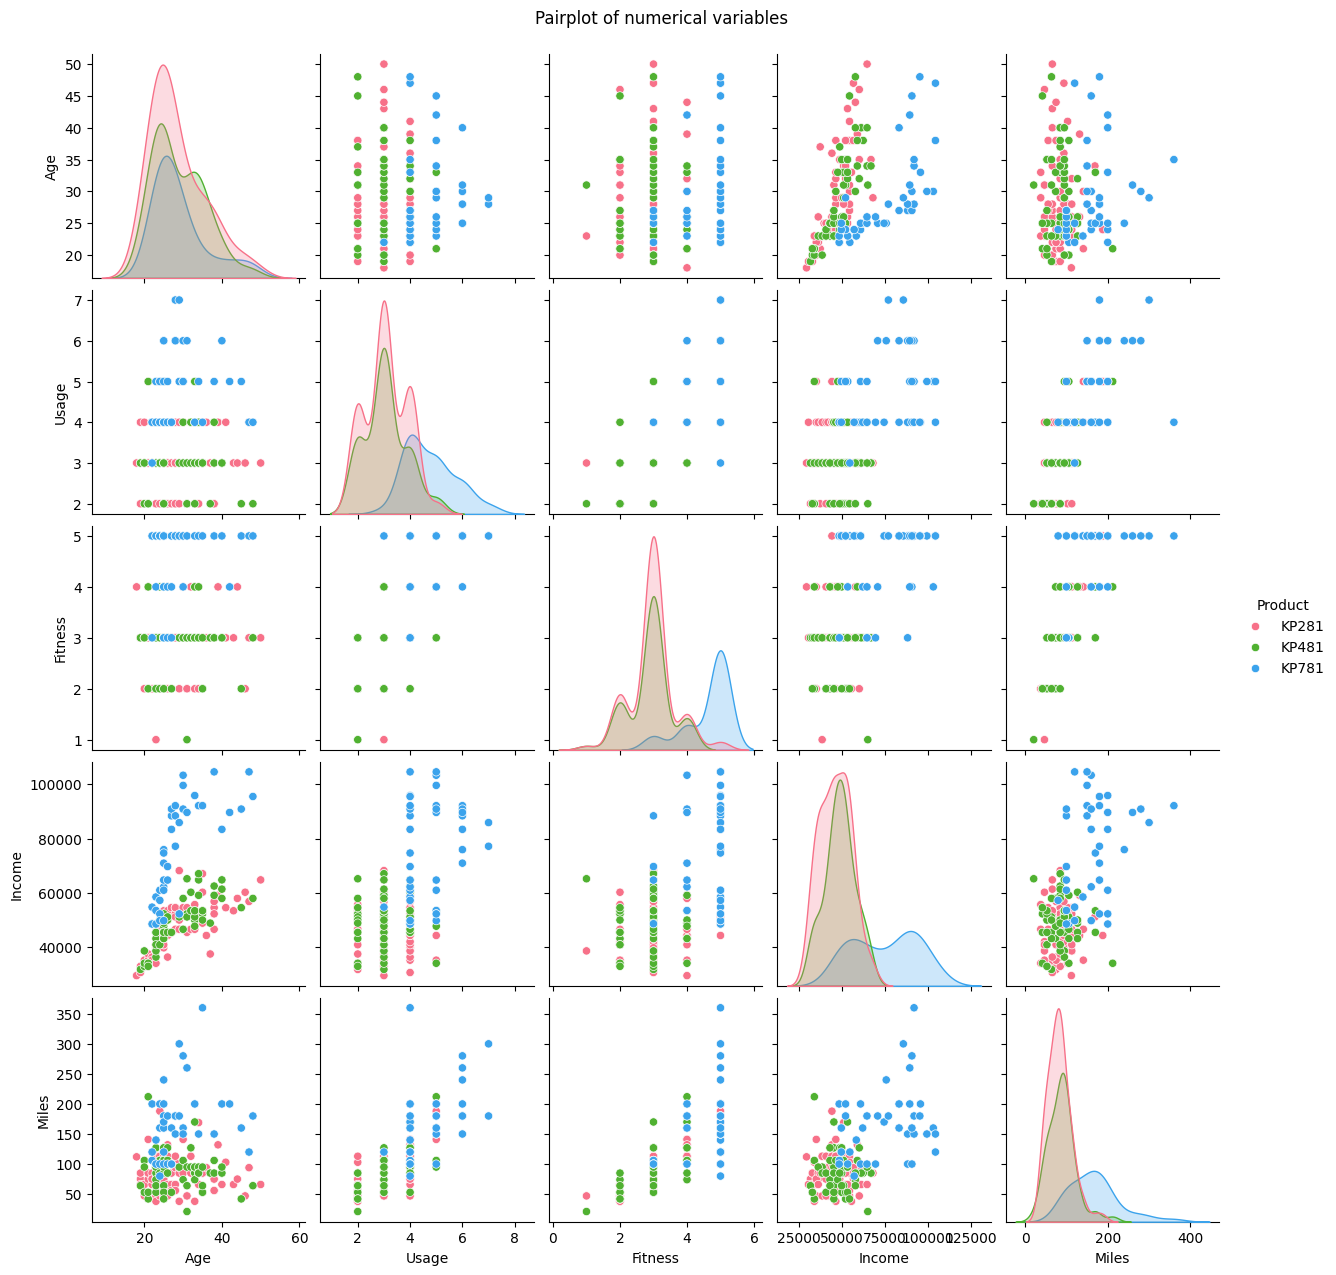

In [ ]:
plt.figure(figsize = (8,6))
sns.pairplot(df[['Age', 'Usage', 'Fitness', 'Income', 'Miles', 'Product']], hue = 'Product', palette = 'husl')
plt.suptitle('Pairplot of numerical variables', y = 1.02)
plt.show()

#Observations:
- The primary purpose of a pair plot is to shows the relationship between every possible pair of numerical variables in the dataset
- By Looking at the scatter plots.
- Linear Relationships : Do the points tend to follow a straight line( Positive / Negative Correlated)
- Non-Linear relationships
- Outliers, clusters.

###**PRODUCT DISTRIBUTION**

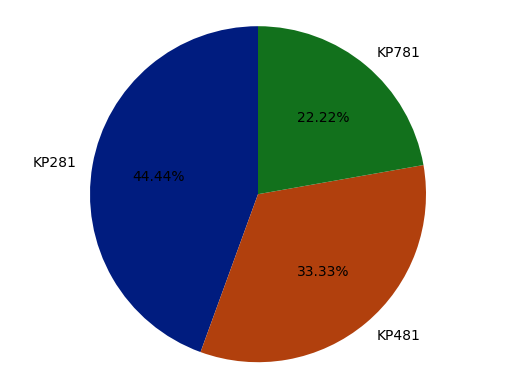

In [ ]:
type_count = df['Product'].value_counts()
labels = type_count.index
sizes = type_count.values

plt.pie(sizes, labels = labels, autopct = '%.2f%%', startangle = 90, colors =  sns.color_palette('dark'))
plt.axis('equal')
plt.show()

###**GENDER DISTRIBUTION**

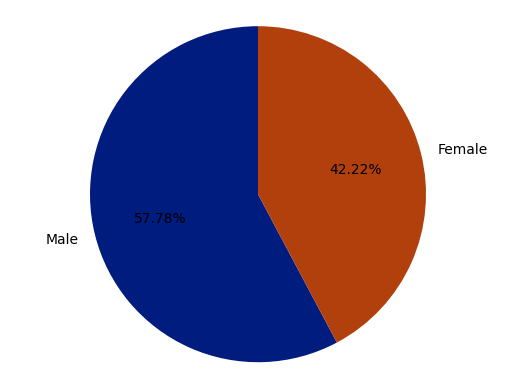

In [ ]:
type_count = df['Gender'].value_counts()
labels = type_count.index
sizes = type_count.values

plt.pie(sizes, labels = labels, autopct = '%.2f%%', startangle = 90, colors =  sns.color_palette('dark'))
plt.axis('equal')
plt.show()

###**MARITAL STATUS DISTRIBUTION**

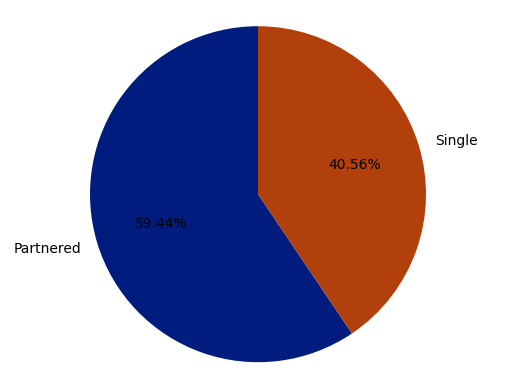

In [ ]:
type_count = df['MaritalStatus'].value_counts()
labels = type_count.index
sizes = type_count.values

plt.pie(sizes, labels = labels, autopct = '%.2f%%', startangle = 90, colors =  sns.color_palette('dark'))
plt.axis('equal')
plt.show()

###**EDUCATION LEVEL DISTRIBUTION**

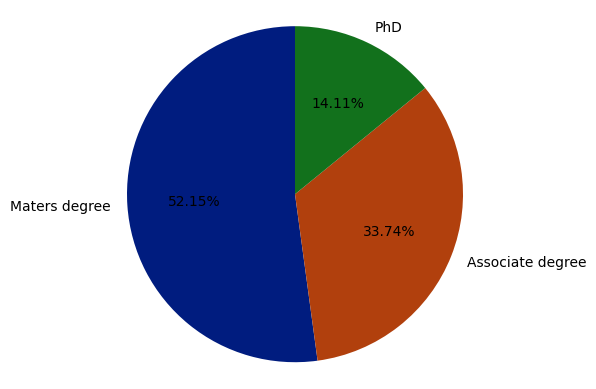

In [ ]:
type_count = df['education_level'].value_counts().head(3)
labels = type_count.index
sizes = type_count.values

plt.pie(sizes, labels = labels, autopct = '%.2f%%', startangle = 90, colors =  sns.color_palette('dark'))
plt.axis('equal')
plt.show()

###**USAGE LEVEL DISTRIBUTION**

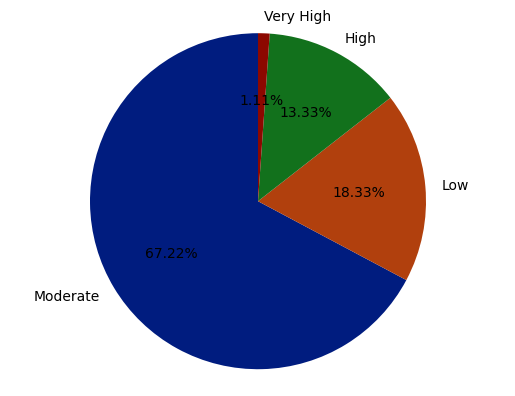

In [ ]:
type_count = df['usage_level'].value_counts()
labels = type_count.index
sizes = type_count.values

plt.pie(sizes, labels = labels, autopct = '%.2f%%', startangle = 90, colors =  sns.color_palette('dark'))
plt.axis('equal')
plt.show()

###**FITNESS LEVEL DISTRIBUTION**

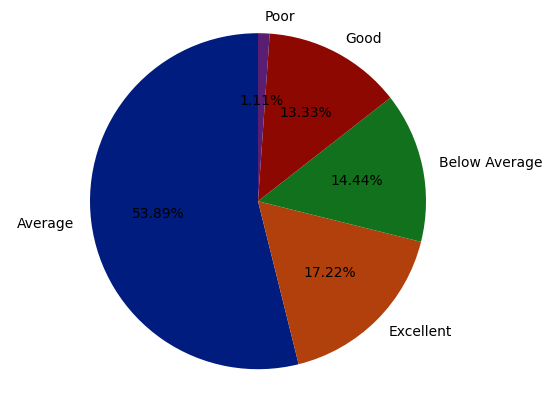

In [ ]:
type_count = df['fitness_level'].value_counts()
labels = type_count.index
sizes = type_count.values

plt.pie(sizes, labels = labels, autopct = '%.2f%%', startangle = 90, colors =  sns.color_palette('dark'))
plt.axis('equal')
plt.show()

###**DEEPER INSIGHTS:**
- Customers mostly prefering all kind of products, In that Male customers & Partnered customers are dominating One.
- The most popular product is KP281, & More expensive product is KP781.
- customers who are age between 18-30 are frequently using KP281 & KP781.
- The customers who have higher Income predominantly prefering KP781 which is expensive product.
- The male customers & thier fittness is excellent in terms of rating, But Female customers & their fitness level is average.